 <h2>Исследование продуктовых гипотез.<a class="tocSkip"> </h2>

 <h3>Описание проекта:<a class="tocSkip"> </h3>

Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами.

<h3>Описание данных:<a class="tocSkip"> </h3>

В распоряжение три датасета:

+ hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

+ orders.csv и visitors.csv - в них находятся результаты A/B-теста.


<h3>Цель исследования:<a class="tocSkip"> </h3>

1. Выяснить какая из гипотез приведет к наибольшему увеличению выручки.
2. Принять решение по результатам А/В тетста.

<h3>План работы над проектом:<a class="tocSkip"> </h3>

1. Обзор данных.


2. Предобработка данных.


3. Приоритизация гипотез.


4. Анализ A/B-теста, принятие решения по результатам теста и объясните его.

## Обзор данных

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as st
import datetime as dt

pd.set_option('display.max_colwidth', 0)



In [2]:
# открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    hypothesis, orders, visitors = (
                            pd.read_csv('hypothesis.csv'),
                            pd.read_csv('orders.csv'),
                            pd.read_csv('visitors.csv')
                            )
except:
    # Yandex path
    hypothesis, orders, visitors = (
                            pd.read_csv('/datasets/hypothesis.csv'),
                            pd.read_csv('/datasets/orders.csv'),
                            pd.read_csv('/datasets/visitors.csv')
                            )

In [3]:
# Функция получения первичной информации о датафрейме
def first_look (data):
    print('---------Первые 10 строк-----------')
    display(data.head(10))
    
   # print('---------Последние 5 строк---------')
   # display(data.tail(5))
    
    print('---------Типы данных------------\n')
    display(data.info())
    
    print('---------Статистическая сводка-------------')
    display(data.describe())
    
    print('---------Пропуски----------\n')
    display(data.isna().sum().sort_values(ascending=False))
    
    print('\n---------Процент пропусков от всего датасета-----------')
    display(data.isna().mean().sort_values(ascending=False)*100)

### Таблица hypothesis - гипотезы

In [4]:
first_look (hypothesis)

---------Первые 10 строк-----------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


---------Типы данных------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

---------Статистическая сводка-------------


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


---------Пропуски----------



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


---------Процент пропусков от всего датасета-----------


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

<b>Вывод:</b> \
В файле - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Таблица содержит 9 строк, пропуски отсутствуют.

<b>Содержание данных:</b>

+ Hypothesis — краткое описание гипотезы;
+ Reach — охват пользователей по 10 балльной шкале;
+ Impact — влияние на пользователей по 10-балльной шкале;
+ Confidence — уверенность в гипотезе по 10-балльной шкале;
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b>Необходимые изменения:</b>

+ привести наименования столбцов к единому стилю (нижний регистр)

### Таблица orders - заказы

In [5]:
first_look (orders)

---------Первые 10 строк-----------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


---------Типы данных------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

---------Статистическая сводка-------------


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


---------Пропуски----------



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


---------Процент пропусков от всего датасета-----------


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [6]:
#минимальная и максимальная дата 
print(orders['date'].min())
print(orders['date'].max())

2019-08-01
2019-08-31


<b>Вывод:</b>

В файле - результаты проведения А/В теста за август 2019

Таблица содержит 1197 строк, пропуски отсутствуют.

<b>Содержание данных:</b>

+ transactionId — идентификатор заказа;
+ visitorId — идентификатор пользователя, совершившего заказ;
+ date — дата, когда был совершён заказ;
+ revenue — выручка заказа;
+ group — группа A/B-теста, в которую попал заказ.

<b>Необходимые изменения:</b>

+ привести наименования столбцов к единому стилю (нижний регистр) и snake case;
+ привести колонку date к формату datetime.

### Таблица visitors - посетители

In [7]:
first_look(visitors)

---------Первые 10 строк-----------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


---------Типы данных------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

---------Статистическая сводка-------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


---------Пропуски----------



date        0
group       0
visitors    0
dtype: int64


---------Процент пропусков от всего датасета-----------


date        0.0
group       0.0
visitors    0.0
dtype: float64

In [8]:
#минимальная и максимальная дата 
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01
2019-08-31


<b>Вывод:</b>

В файле - сводные данные по результатам проведения А/В теста за август 2019

Таблица содержит 62 строки, пропуски отсутствуют.

<b>Содержание данных:</b>

+ date — дата;
+ group — группа A/B-теста;
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<b>Необходимые изменения:</b>

+ привести колонку date формату datetime

### <b>Вывод по разделу 1</b> 

В представленных для анализа файлах - данные для приоритизации гипотез и результаты проведения А/В теста за период с 01.08.2019 по 31.08.2019. Предварительно данных достаточно для анализа.

<b>Необходимые изменения:</b>

+ Исправим нарушения стиля наименования колонок (не соблюден snake case, присутствуют прописные буквы в наименованиях столбцов)

+ Устраним несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime в столбцах date файлов orders и visitors

## Предобработка данных

### Нарушения стиля (приведение названия столбцов к нижнему регистру и snacke_case)

In [9]:
# перевод в нижний регистр:
files = [hypothesis, orders]
for name in files:
    name.columns = name.columns.str.lower()
    print(name.columns) 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


In [10]:
# snacke_case:
orders = orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'})
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


### Замена формата

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим внесенные изменения:

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверка на дубликаты

In [14]:
#проверка файлов на дубликаты:
files = [hypothesis, orders, visitors]

for name in files:
    print(f'Количество дубликатов: {name.duplicated().sum()} штук')
        

Количество дубликатов: 0 штук
Количество дубликатов: 0 штук
Количество дубликатов: 0 штук


### <b>Вывод по разделу 2</b> 

В результате предобработки данных исправлены нарушения стиля в наименовании столбцов и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты отсутствуют. Данные готовы для анализа.

## Приоритизация гипотез

### Приоритизация с помощью фреймворка ICE

In [15]:
# рассчитаем значение показателя ICE
hypothesis['ice'] = (
   hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
)

# выведем данные, отсортированные по убыванию показателя ICE
display(round(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)), 2)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


2

### Приоритизация с помощью фреймворка RICE

In [16]:
# рассчитаем значение показателя RICE
hypothesis['rice'] = (
    hypothesis['reach'] * hypothesis['ice']
)

# выведем данные, отсортированные по убыванию показателя RICE
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Изменения в приоритизации гипотез при применении RICE вместо ICE

In [17]:
display(hypothesis[['hypothesis', 'ice', 'rice', 'reach']].sort_values(by='ice', ascending=False))

,hypothesis,ice,rice,reach
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0,10
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0,3


### <b>Вывод по разделу 3</b> 

При обоих методах в лидерах гипотезы 7 и 0 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", при том, что форму подписки на основных страницах увидят почти все посетители сайта, а новые каналы трафика, вероятно, 30% пользователей.

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения", несмотря на то, что затрагивает вроде бы всех пользователей, затрагивает их не одномоментно, к тому же информацию о новой ации нужно еще до них донести. Поэтому при применении метода RICE вместо ICE эта гипотеза опускается с 1 на 5 место. 

Так как мы предполагаем, что блоки рекомендаций увидит очень большая доля пользователей, гипотеза 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" поднимается с пятого места до второго. 

В качестве наиболее приоритетной возьмем гипотезу 7 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', выбранную с применением фреймворка RICE

## Анализ A/B-теста

Проведем анализ полученных результатов проведенного A/B-теста: сперва рассчитаем кумулятивные метрики, проанализируем, затем проведем А/В тестирование до и после удаления выбросов.

Предварительно проверим выборки на предмет пользователей, попавших в обе группы:

In [18]:
#выборка пользователей, попавших в обе выборки
duplicated_users = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())
len(duplicated_users)

,groups,group_names
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58

In [44]:
print('Общее количество пользователей до удаления "двойных" пользователей -', orders['visitor_id'].nunique())
print('количество пользователей в группе А -', orders.query('group == "A"')['visitor_id'].nunique())
print('количество пользователей в группе В -', orders.query('group == "B"')['visitor_id'].nunique())

Общее количество пользователей до удаления "двойных" пользователей - 1031
количество пользователей в группе А - 503
количество пользователей в группе В - 586


Пользователей попавших в обе группы - 58, это около 10% в каждой группе. Их участие сразу в обоих группах может исказить результаты, а также повлиять на расчет выбросов. Но поскольку нам известны только id пользователей, совершивших хоть один платеж, а "неплатящие" неизвестны, то удаление таких пользователей может также исказить результаты в сторону "неплатящих". Оставим их в данных, а результаты будем анализировать предварительно разделив данные по группам А и В.


<h3>Расчет кумулятивных метрик, необходимых для анализа.<a class="tocSkip"> </h3>

Произведем расчет кумулятивных метрик в разрезе групп тестирования: суммарное число заказов, суммарную выручку, количество пользователей до выбранной даты включительно.

In [20]:
# делим visitors по группам и считаем кумулятивные данные по датам

# группа А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# группа В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']


#делим orders по группам и считаем кумулятивные данные по датам

# группа А
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]
# группа В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

#собираем данные в единый фрейм
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.tail(5)) 

order_by_user_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
order_by_user_a.columns = ['visitor_id', 'orders']

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
28,2019-08-29,22,320690,20,231130,534,3936510,596,5559398,577,531,17547,17708
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916


Мы получили сводный датафрейм date со столбцами:

+ orders_per_date_a — количество заказов в выбранную дату в группе A;
+ revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
+ orders_per_date_b — количество заказов в выбранную дату в группе B;
+ revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
+ orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
+ revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
+ orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
+ revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
+ visitors_per_date_a — количество пользователей в выбранную дату в группе A;
+ visitors_per_date_b — количество пользователей в выбранную дату в группе B;
+ visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
+ visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

### График кумулятивной выручки по группам.

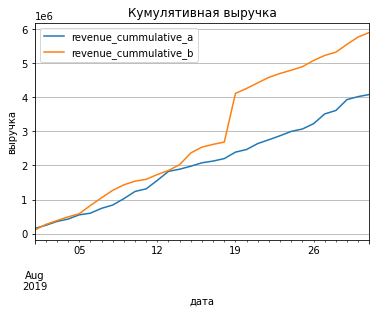

In [21]:
data[['date','revenue_cummulative_a', 'revenue_cummulative_b']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивная выручка").set(
                  xlabel = 'дата', ylabel = 'выручка');

<b>Вывод:</b> 


По графику видим, что кумулятивная выручка в обеих группах равномерно увеличивается в течение всего теста, но кривая выручки группы B стабильно выше, чем аналогичный показатель группы А. На графике выручки группы B есть резкий скачок в районе 18-19 августа. Это может быть связано как со всплеском числа заказов в данной группе, так и с аномально крупными заказами. 

### График кумулятивного среднего чека по группам.

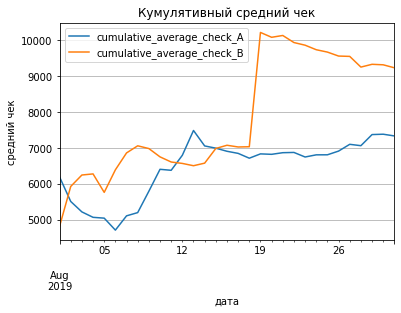

In [22]:
data['cumulative_average_check_A'] = data['revenue_cummulative_a'] / data['orders_cummulative_a']
data['cumulative_average_check_B'] = data['revenue_cummulative_b'] / data['orders_cummulative_b']

data[['date','cumulative_average_check_A', 'cumulative_average_check_B']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивный средний чек").set(
                  xlabel = 'дата', ylabel = 'средний чек');

<b>Вывод:</b>

Средний чек в группе A за первые две недели подрос и стабилизировался, а в группе B резко подскочил 18-19 августа и стал плавно снижаться к концу теста.  С учётом того, что средний чек это выручка, делённая на число заказов, можно сделать вывод, что 18-19 августа всё же было не аномальное увеличение числа заказов, а заказы с аномальной сумммой.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

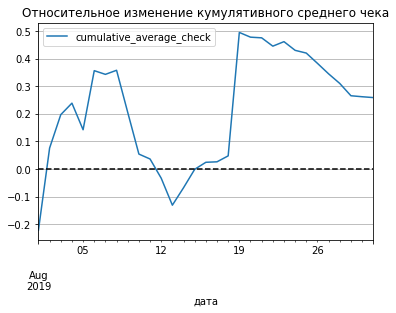

In [23]:
data['cumulative_average_check'] = data['cumulative_average_check_B'] / data['cumulative_average_check_A']-1


data[['date','cumulative_average_check']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивного среднего чека").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');

<b>Вывод:</b>

Относительное изменение кумулятивного среднего чека показывает, что практически на всём протяжении теста средний чек группы B превосходил средний чек группы A. С 18-19 августа отношение начинает равномерно снижаться. Блольшие скачки графика говорят о возможных выбросах.

### График кумулятивной конверсии

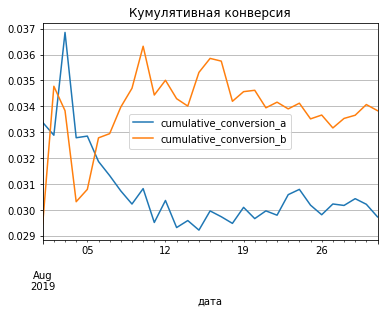

In [24]:
data['cumulative_conversion_a'] = data['orders_cummulative_a'] / data['visitors_cummulative_a']
data['cumulative_conversion_b'] = data['orders_cummulative_b'] / data['visitors_cummulative_b']

data[['date','cumulative_conversion_a', 'cumulative_conversion_b']] .plot(x = 'date',
                  grid=True,  
                  title = "Кумулятивная конверсия").set(
                  xlabel = 'дата');

<b>Вывод:</b> 

До 6 августа конверсии колебались, затем группа A постепенно стала проседать, а группа B наоборот росла. После 12 августа конверсии стабилизировались, причем у гуппы В конверсия выше более чем на 10% .

### График относительного изменения кумулятивной конверсии

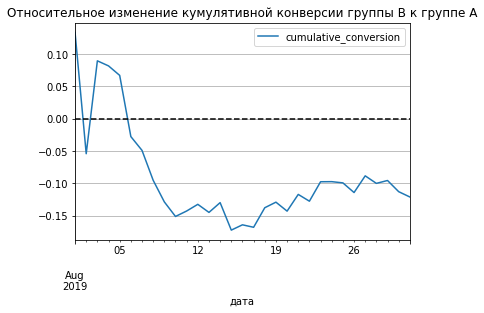

In [25]:
data['cumulative_conversion'] = data['cumulative_conversion_a'] / data['cumulative_conversion_b']-1


data[['date','cumulative_conversion']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивной конверсии группы B к группе A").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');

<b>Вывод:</b> 

В целом отношение конверсий стабилизировалось - причем группа A проигрывает группе B на протяжении почти всего теста.

### Точечный график количества заказов по пользователям.

Создадим переменную, в которой сформируем данные по пользователям и количеству заказов каждого (по тем, кто совершил хоть один заказ):

In [26]:
orders_by_users = orders.groupby('visitor_id',as_index=False)['transaction_id'].count()
orders_by_users.columns = ['visitor_id', 'order_count']

print('Минимальное количество заказов:', orders_by_users['order_count'].min())
print('Маскимальное количество заказов:', orders_by_users['order_count'].max())
print('Количество платящих пользователей:', len(orders_by_users))
print('Кoличество заказов:', orders_by_users['order_count'].sum())
display(orders_by_users.head())

Минимальное количество заказов: 1
Маскимальное количество заказов: 11
Количество платящих пользователей: 1031
Кoличество заказов: 1197


,visitor_id,order_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


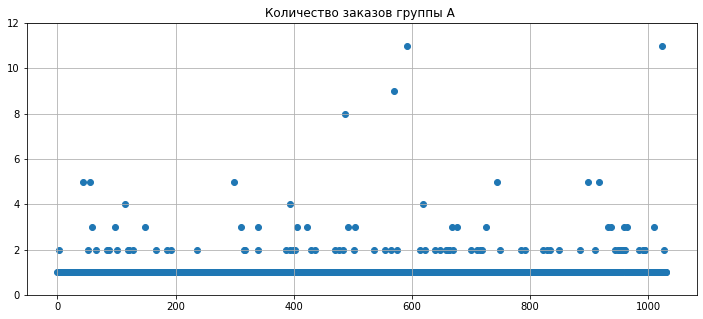

In [27]:
plt.figure(figsize=(12,5))
plt.grid()

x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['order_count']) 
plt.title("Количество заказов группы А ")
plt.ylim(0,12)
plt.show()

<b>Вывод:</b> График показывает, что основная часть пользователей сделала по 1 заказу. Есть большая группа пользователей с 2 заказами, небольшая группа с 3 заказами и далее аномальные пользователи с 4-мя и более заказами.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для аномальных заказов.

In [28]:
print(np.percentile(orders_by_users['order_count'], [95, 99]))

[2. 4.]


<b>Вывод:</b>

Итак, не более 5% пользователей оформляли более 2 заказов, и не более 1% оформляли более 4-х.

Будем считать всех пользователей, сделавших более 2 заказов аномалиями.

### Точечный график стоимостей заказов. 

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


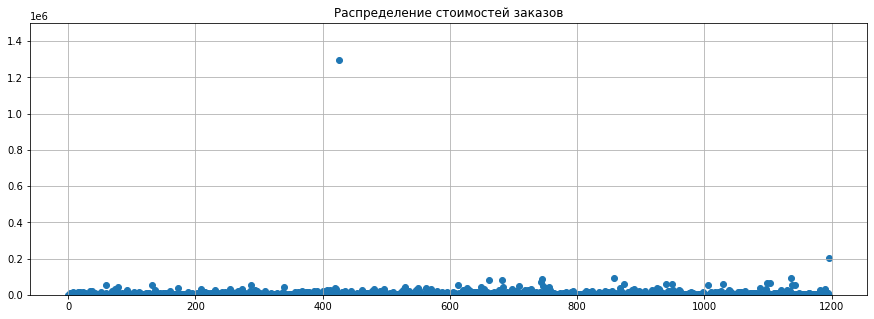

In [29]:
revenue_per_orders = orders['revenue']

plt.figure(figsize=(15,5))
plt.grid()

x_values = pd.Series(range(0,len(revenue_per_orders)))
plt.scatter(x_values, revenue_per_orders) 
plt.title('Распределение стоимостей заказов')

plt.ylim(0,1500000)

display(orders.loc[orders['revenue'] > 200000])

На графике присутствуют две ярких аномалии - заказ стоимостью более 1,2 млн. ₽ и заказ стоимостью более 200 000 от 19 и 15 августа соответственно. Основная часть заказов имеет стоимость ориентировочно не более 30000₽. 

Построим более наглядный график, уберем эти 2 выброса.

(0.0, 100000.0)

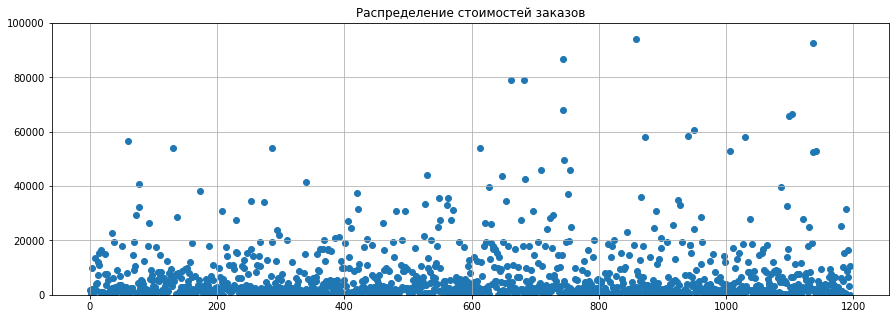

In [30]:
plt.figure(figsize=(15,5))
plt.grid()

x_values = pd.Series(range(0,len(revenue_per_orders)))
plt.scatter(x_values, revenue_per_orders) 
plt.title('Распределение стоимостей заказов')

plt.ylim(0,100000)

<b>Вывод:</b>

У большинства пользователей сумма заказа не превышает 10 тыс. рублей, порог заказов не превышает 100 тыс руб. Можно заметить один аномально большой заказ от 19 августа на сумму 1 294 500р. Судя по всему это и есть причина резкого скачка кумулятивного среднего чека 19 августа. В остальном группы очень похожи между собой.

### Расчет 95-й и 99-й перцентили стоимости заказов. Определение границы для аномальных заказов.

In [31]:
print(np.percentile(revenue_per_orders, [95, 99])) 

[28000.  58233.2]


<b>Вывод:</b>
Большинство пользователей (95%) сделали заказы на сумму не более 28000₽. И лишь 1% пользователей делали заказы стоимостью выше 58233,2₽. Т.е. обе наши аномалии входят в этот 1%. 

Будем считать все заказы стоимостью более 28000 аномалиями.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

Создадим переменные по группам А и В , в которых сформируем данные по пользователям и количеству заказов каждого(по тем, кто совершил хоть один заказ):

In [32]:
orders_by_users_a = orders.query('group == "A"').groupby('visitor_id',as_index=False)['transaction_id'].count()
orders_by_users_a.columns = ['visitor_id', 'order_count']

orders_by_users_b = orders.query('group == "B"').groupby('visitor_id',as_index=False)['transaction_id'].count()
orders_by_users_b.columns = ['visitor_id', 'order_count']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменные sample_a(b) будут состоять из двух частей:

+ Список с количеством заказов для каждого из пользователей: orders_by_users_a['orders'].

+ Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders']). Для этого создадим объект pd.Series нужной длины.

In [33]:
sample_a = pd.concat([
                     orders_by_users_a['order_count'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['order_count'])),
                     name='order_count')
                     ],axis=0)

sample_b = pd.concat([
                     orders_by_users_b['order_count'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['order_count'])),
                     name='order_count')
                    ],axis=0)

Сформулируем гипотезы:

+ Н0 :статистически значимых различий в конверсии между группами нет.
+ Н1 : статистически значимые различия в конверсии между группами есть.

Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05.

In [34]:
# расчет p-value критерия Манна-Уитни
print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_a, sample_b, True, 'two-sided')[1]))

# расчет относительного изменения конверсии клиента группы В относительно группы А
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))


p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Таким образом, по "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%(на столько конверсия группы В больше конверсии группы А).

<b>Вывод:</b>

Гипотеза, что различий в конверсии между группами в "сырых" данных нет, отвергнута. Относительная разница конверсии группы В на 13.8% больше, чем в группе А.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами.

Сформулируем гипотезы:

Н0 :статистически значимых различий в среднем чеке заказа между группами нет. \
Н1 : статистически значимые различия в среднем чеке заказа между группами есть. \
Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [35]:
# расчет p-value критерия Манна-Уитни
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))

# расчет относительного различия суммы среднего чека

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259



По "сырым данным "P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. При этом относительный выигрыш в размере среднего чека группы "B" над "A" равен 25,9%.

<b>Вывод:</b>

Гипотеза о том, что в "сырых" данных суммы среднего чека в обоих группах равны, с большой степенью вероятности не отвергнута. Но относительная разница суммы среднего чека между группами составила 25.9%. Возможно причина такого различия в выбросах.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

Для того чтобы очистить данные от выбросов, сделаем следующее:

Ранее мы определили за аномальных пользователей тех, кто совершил более 2  заказов или совершил заказ дороже                28000 рублей. 
+ Создадим срезы пользователей с числом заказов больше 2 — users_with_many_orders_a(b) и пользователей, совершивших заказы дороже 28000 рублей -  users_with_expensive_orders_a(b). 
+ Объединим их в таблице abnormal_users_a(b).

Сделаем это для каждой группы.

In [36]:
#для группы А
users_with_many_orders_a = orders_by_users_a[orders_by_users_a['order_count'] > 2]['visitor_id']
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(revenue_per_orders, 95)]['visitor_id']

abnormal_users_a = (
    pd.concat([users_with_many_orders_a, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users_a.head(5))
print('количество аномальных пользователей группы A:',abnormal_users_a.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
количество аномальных пользователей группы A: (68,)


In [37]:
#для группы B
users_with_many_orders_b = orders_by_users_b[orders_by_users_b['order_count'] >np.percentile(orders_by_users['order_count'], 95)]['visitor_id']
  
abnormal_users_b = (
    pd.concat([users_with_many_orders_b, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users_b.head(5))
print('количество аномальных пользователей группы B:', abnormal_users_b.shape) 

1099    148427295
928     204675465
37      249864742
684     358944393
648     382846391
Name: visitor_id, dtype: int64
количество аномальных пользователей группы B: (65,)


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [38]:
# группа A
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users_a))]['order_count'],
     pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['order_count'])),
     name='order_count',),],
     axis=0,
)

# группа B
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users_b))
        ]['order_count'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['order_count'])
            ),
            name='order_count',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам с "очищенными" от выбросов данными.

Гипотезы:

+ Н0 :статистически значимых  различий в конверсии между группами нет.
+ Н1 : статистически значимые  различий в конверсии между группами есть. 

Уровнем статистической значимости примем значение 0,05

In [39]:
# расчет p-value критерия Манна-Уитни
print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered, True, 'two-sided')[1]))

# расчет относительного изменения конверсии клиента группы В относительно группы А
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


<b>Вывод:</b>

p-value = 0.01 меньше 0.05, значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Получается и по «очищенным» данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,3% (выше, чем с «сырыми» данными - 13.8%) .

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Теперь посмотрим произошло ли что-нибудь с результатами по среднему чеку с«очищенным» данными:
    
Сформулируем гипотезы:

Н0 :статистически значимых различий в среднем чеке заказа между группами нет. \
Н1 : статистически значимые различия в среднем чеке заказа между группами есть. \
Уровнем статистической значимости примем значение 0,05

In [40]:
# p-value критерия Манна-Уитни
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users_a)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users_b)))]['revenue'], alternative = 'two-sided')[1]))

# относительные различия суммы среднего чека
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users_b)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users_a)))]['revenue'].mean() - 1)) 

display(orders.loc[orders['revenue'] > 1000000])

p-value = 0.869
Относительный показатель 'B' и 'A' = -0.012


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


<b>Вывод:</b>

p-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "сырыми" данными).

А вот относительный выигрыш в размере среднего чека по "очищенным" данным в пользу группы А - 1,2%, тогда как по "сырым" данным он составлял 25,9% в пользу группы В. Причина в онамольно большом заказе в группе B 19 августа на сумму более 1,2млн рублей. 


### <b>Вывод по разделу 4</b> 

1. Данные для теста были подготовлены неудовлетворительно. В данных присутствует 58 посетителей, которые входят как в группу A так и в группу B.
2. Кумулятивная выручка по обеим группам равномерно увеличивалась в течение теста. В группе B имеется аномальный скачок графика 19 августа.
3. Средний чек в группе A за первые две недели подрос и стабилизировался, а в группе B резко подскочил 19 августа и стал плавно снижаться к концу теста. Так же в группе 
4. Относительное изменение кумулятивного среднего чека показывает, что практически на всём протяжении теста средний чек группы B превосходил средний чек группы A. С 19 августа отношение начинает равномерно снижаться.
5. До 6 августа конверсии колебались, затем группа A постепенно стала проседать, а группа B наоборот росла. После 12 августа конверсии стабилизировались, причем у гуппы В конверсия гораздо выше.
6. В целом отношение конверсий стабилизировалось - причем группа A проигрывает группе B на протяжении почти всего теста.
7. Не более 5% пользователей оформляли более 2 заказов, и не более 1% оформляли более 4-х.
8. Большинство пользователей (95%) сделали заказы на сумму не более 28000₽. И лишь 1% пользователей делали заказы стоимостью выше 58233,2₽
10. Статистическая значимость различий между конверсиями групп по "сырым" данным подтверждена.
11. Статистическая значимость различий между средними чеками групп по "сырым" данным отсутствует.
12. Статистическая значимость различий между конверсиями групп по "очищенным" данным подтверждена.
13. Статистическая значимость различий между средними чеками групп по "очищенным" данным отсутствует.


## Общий вывод и решение

1. Из представленных 9 гипотез с применением фреймворка RICE нами была выбрана как наиболее приоритетная гипотеза 7 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'


2. По результатам А/В-тестирования гипотезы были сделаны следующие выводы:
+ кумулятивная выручка группы В стабильно выше выручки группы А;

+ кумулятивный средний чек группы B практически на всём протяжении теста превосходил средний чек группы А, но 19 августа он резко вырос, а затем начинает равномерно снижаться. Это объясняется аномальнно большой покупкой в группе B 19 августа  на сумму 1 294 500 рублей;

+ конверсии групп устоялись, причем в группе B она стабильно выше, чем в группе А;

+ Статистическими тестами подтверждено наличие статистически значимых различий в конверсиях между группами. При этом, по "очищенным" данным относительный выигрыш группы B даже выше 17,3%;

+ Статистическими тестами подтверждено отсутствие статистически значимых различий в средних чеках между группами. 

Получается, что покупательское поведение в группах одинаковое, но привлечение пользователей в группе B идёт лучше. Средний прирост конверсии в 17,3% это хороший показатель!

<b>По результатам A/B теста принимаем решение тест остановить зафиксировать победу группы B.</b>


